####**SARIMAX MODEL** (Seasonal AutoRegressive Integrated Moving Average with Exogenous Variables)
Time series forecasting is a technique used to predict future values or patterns in a sequence of data points ordered by time. One powerful model for analyzing and forecasting time series data is SARIMAX. SARIMAX extends the popular ARIMA model by incorporating,

*   seasonality
*   impact on external variables

making it a versatile and effective choice for a wide range of forecasting applications.

###**The key components of SARIMAX are as follows**
######**Seasonal Autoregressive (SAR) Component:**
The seasonal autoregressive component captures the relationship between the observations and their seasonal lagged values. It represents the dependence of the current observation on past observations from previous seasonal periods. The order of the seasonal autoregressive component is denoted by P.
######**Seasonal Moving Average (SMA) Component:**
The seasonal moving average component models the dependency between the observation and the residual errors from previous seasonal periods. It accounts for the short-term shocks or noise that occur at specific seasonal lags. The order of the seasonal moving average component is denoted by Q.

######**Integrated (I) Component:**
The integrated component deals with differencing the observations to make the time series stationary. Differencing involves taking the difference between consecutive observations to remove trends or seasonality. The order of differencing is denoted by d.

#####**Exogenous Variables(X):**
Exogenous variables, also known as external variables or covariates, are factors that are not part of the time series itself but are believed to have a significant influence on its behavior. These variables can include any additional information or data that is known in advance and can affect the time series. Exogenous variables are included in the SARIMAX model to account for their impact.
######examples,

*   In retail : advertising expenditures, promotional events, or holidays
*   In whether forecasting : humidity, wind speed




*let us understand the time series forecasting concept with the example of future sales prediction*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/datasets/sales.csv")

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.columns=["months","sales"]
df

,months,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop([105,106],axis=0,inplace=True) #removing last two rows
df

,months,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [ ]:
df.isna().sum()   # checking for null values

months    0
sales     0
dtype: int64

In [ ]:
df["month"]=pd.to_datetime(df["months"])

In [ ]:
df["sale"]=df["sales"].astype("int")

In [ ]:
df.drop(["months","sales"],axis=1,inplace=True)

In [ ]:
df

,month,sale
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
...,...,...
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413


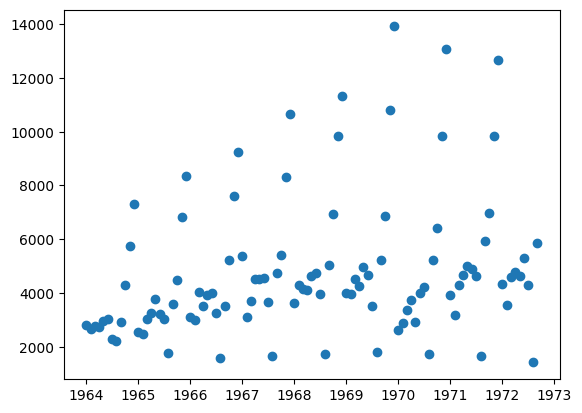

In [ ]:

plt.scatter(x=df["month"],y=df["sale"])


<Axes: xlabel='month'>

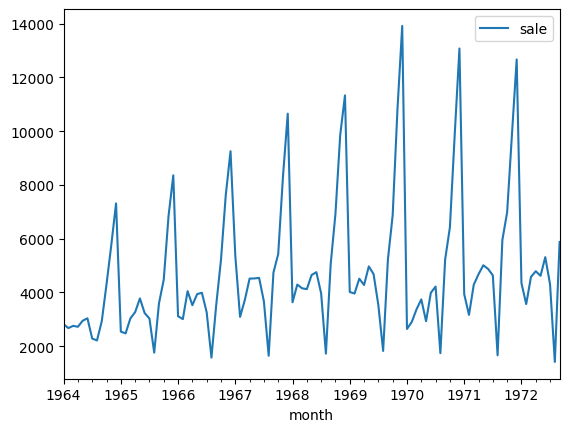

In [ ]:
df.set_index("month",inplace=True)   # setting month column as index variable
df.plot()

##**cheking for stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller     #adfuller is a module used for checking stationarity
result=adfuller(df["sale"])
result

(-1.8335930563276215,
 0.36391577166024586,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df["sale"])
labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for i,j in zip(result,labels):
  print(j,":",i)
print("-----------------------")
if(result[1]<0.05):
  print("it is stationary")
else:
  print("it is not stationary")

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
-----------------------
it is not stationary


######p-value indicates (AR) if it is < 0.05 then dataset is not stationary we should convert it into stationary for accurate predictions
The above dataset is not stationary,stationary is important for accurate forecasting, we can say a dataset is not stationary when the time series data has no constant mean i.e there is more difference on avg sales with respect to period of months. if the sales are not in constant range over period of months we can't get accurate predictions.

#**converting it into stationary by Differencing**

<Axes: xlabel='month'>

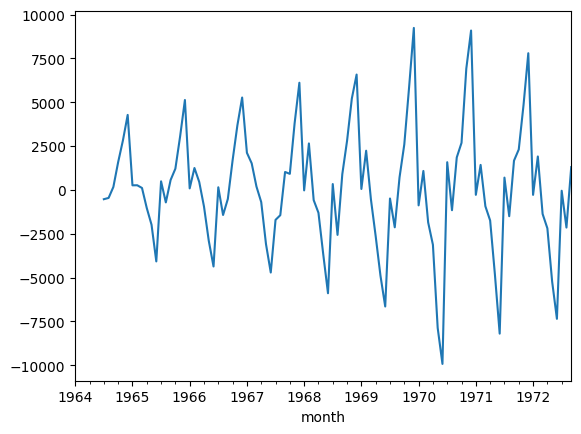

In [ ]:
df["sale"]=df["sale"]-df["sale"].shift(6)  # differencing between sales_sqrt and shifted values over 12 indexes of sales_sqrt
df["sale"].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df["sale"].dropna())
labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for i,j in zip(result,labels):
  print(j,":",i)
print("-----------------------")
if(result[1]<0.05):
  print("it is stationary")
else:
  print("it is not stationary")


ADF Test Statistic : -7.278597607548266
p-value : 1.5212208957659022e-10
#Lags Used : 6
Number of Observations Used : 92
-----------------------
it is stationary


In [ ]:
df


,sale
month,
1964-01-01,NaN
1964-02-01,NaN
1964-03-01,NaN
1964-04-01,NaN
1964-05-01,NaN
...,...
1972-05-01,-5233.0
1972-06-01,-7358.0
1972-07-01,-50.0


<Axes: xlabel='month'>

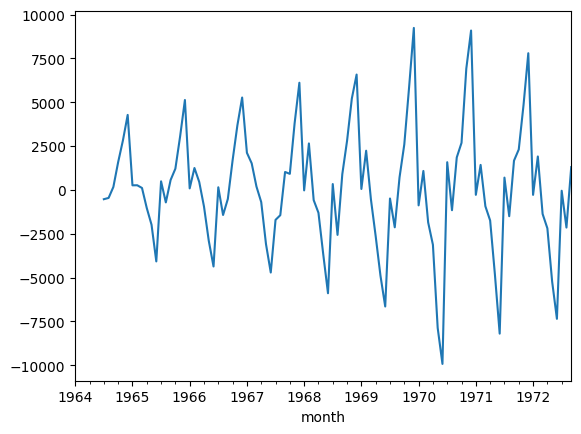

In [ ]:
df["sale"].plot()

###**Fitting our dataset to sarimax model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='month'>

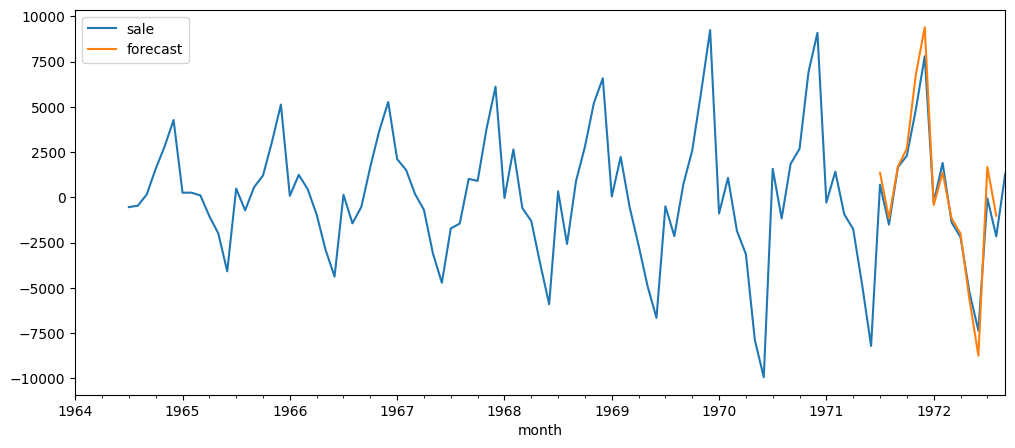

In [ ]:

import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['sale'],order=(1, 1, 1),seasonal_order=(1,1,1,12))

model_fit = model.fit()
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sale','forecast']].plot(figsize=(12,5))

<Axes: xlabel='month'>

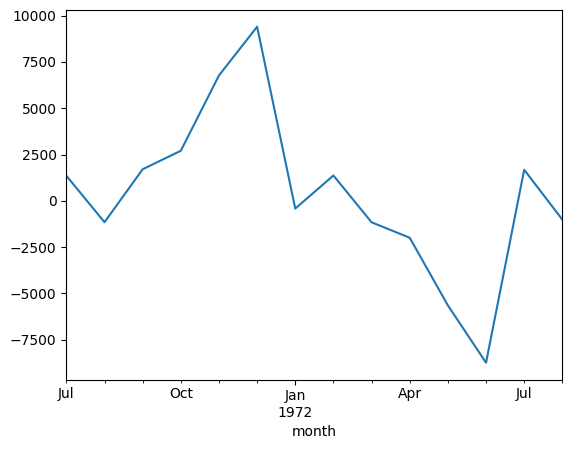

In [ ]:
df["forecast"].dropna().plot()

##**Getting list of future dates from last date onwards in dataset**

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,100)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00'),
 Timestamp('1974-10-01 00:00:00'),
 Timestamp('1974-11-01 00:00:00'),
 Timestamp('1974-12-01 00:00:00'),
 Timestamp('1975-01-

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df

,sale,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
...,...,...
1980-08-01,NaN,NaN
1980-09-01,NaN,NaN
1980-10-01,NaN,NaN
1980-11-01,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df]) #combining future dates dataframe and original dataframe
future_df.tail()

,sale,forecast
1980-08-01,NaN,NaN
1980-09-01,NaN,NaN
1980-10-01,NaN,NaN
1980-11-01,NaN,NaN
1980-12-01,NaN,NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

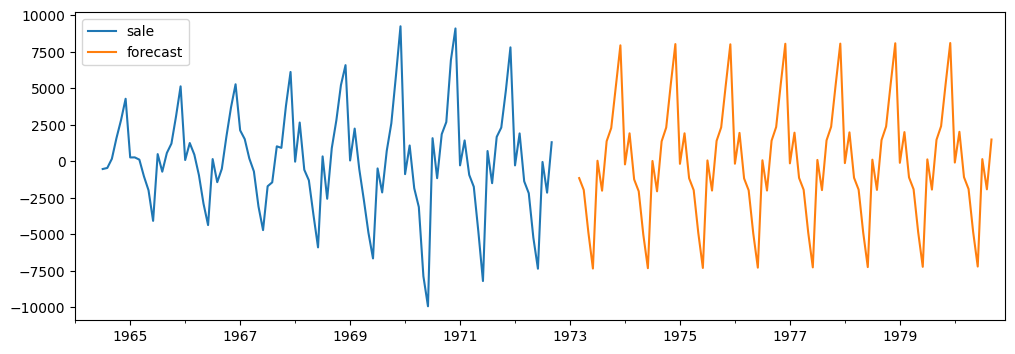

In [ ]:
future_df['forecast'] = model_fit.predict(start = 110, end = 200, dynamic= True)

future_df[['sale', 'forecast']].plot(figsize=(12, 4))
